<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/11_3%EB%8B%B9%EB%87%A8(%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%882).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 3.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 해당 컬럼의 값이 몇개씩 있는지 확인
df["diabetes"].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [10]:
# 정보별 특징
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# 상관 관계
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


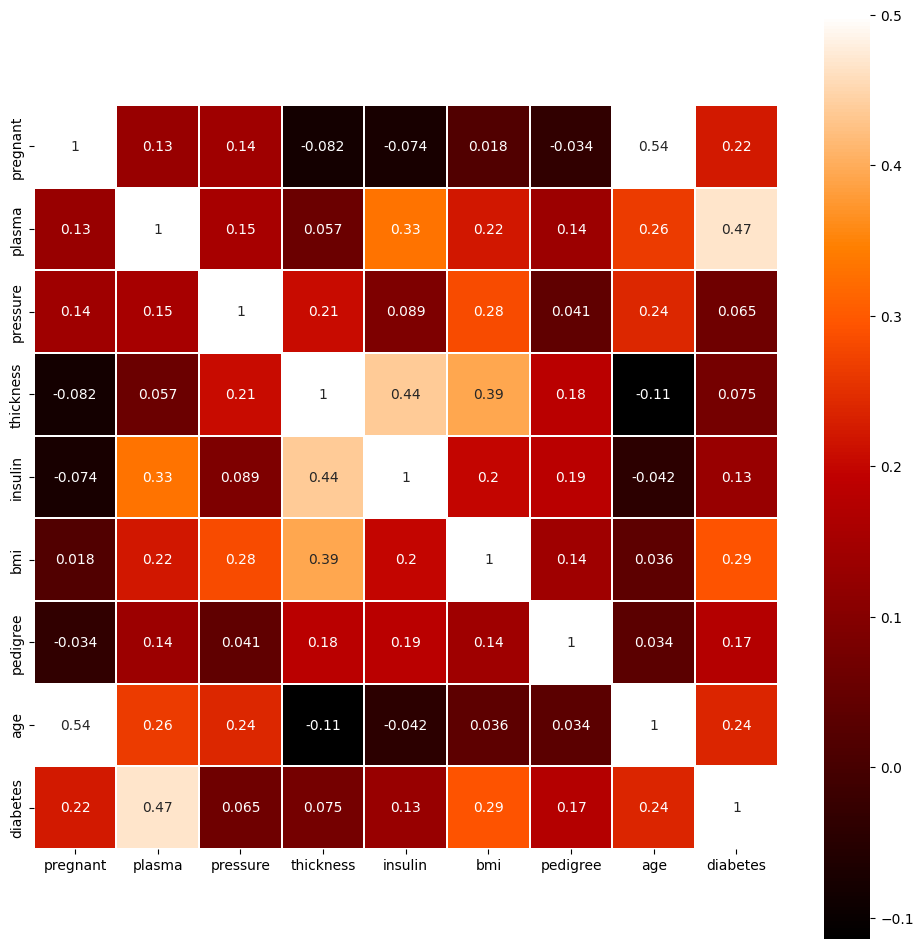

In [13]:
# 그래프 색상구성
colormap = plt.cm.gist_heat
# 그래프 크기
plt.figure(figsize=(12,12))
# 상관관계 그래프
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, square=True, cmap=colormap, linecolor='white', annot=True)
# vmax는 색상의 밝기 조절, cmap는 색상 설정
# https://matplotlib.org/users/colormaps.html  에서 색상 설정 확인
plt.show()

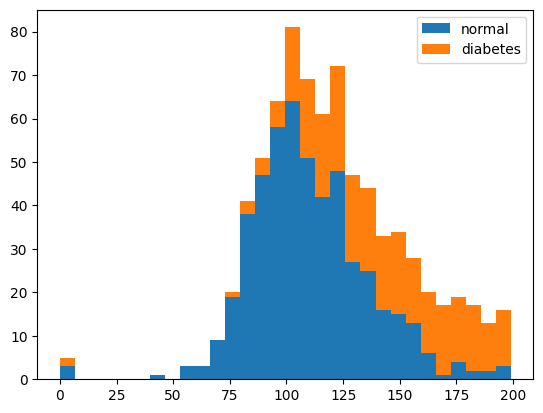

In [14]:
# 중요한데이터 추출하기
# plasma를 기준으로 정상과 당뇨여부 확인
# hist()확인
# 가져올 컬럼을 hist(함수 안에 x축으로 지정)
# df안의 plasma 컬럼 중 diabetes값이 0인것과 1인것을 구분
# bins는 x축을 몇개의 막대로 쪼개어 볼건지
# barstacked 옵션은 여러 데이터가 쌓여 있는 형태의 막대를 생성하는 옵션
# label은 이름을 정상과 당뇨로 표시
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
# plasma수치가 높을수록 당뇨일 경우가 많음을 알 수 있음

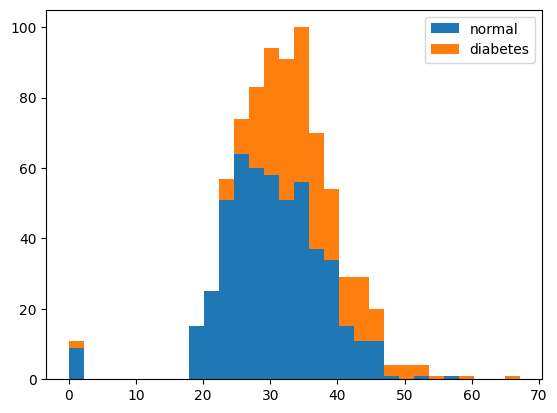

In [16]:
# 이번엔 BMI기준으로 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

In [18]:
# 피마 인디언 당뇨병 예측 실행
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [17]:
# 독립변수와 결과데이터 분리
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
# summary()는 층과 층의 연결을 한눈에 볼 수 있게 해주는 함수
model.summary()
# Layer부분은 층의 이름과 유형, name='층 이름' 해주면 됨
# Output Shape는 각 층에 몇개의 출력이 발생하는지 알려 줌 (샘플의 수(행), 속성의 수(열))
# 행의 수는 batch_size에서 정함, 그래서 None
# 8개의 입력이 12개 8개 1개 가 되는게 보임
# Param은 파라미터 수, 총 가중치와 바이어스 수의 합
# 입력값 8, 노드 12, 바이어스 12는  8*12+12
# Trainable params는 학습을 진행하면서 업데이트가 된 파라미터
# Non-trainable params는 업데이트가 되지 않은 파라미터 수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [21]:
# 모델 실행
history = model.fit(x, y, epochs=100, batch_size=5)
# 딥러닝 지도학습 모델을 만들었음

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 6.1439 - accuracy: 0.5052
Epoch 2/100
154/154 [==============================] - 1s 3ms/step - loss: 2.1900 - accuracy: 0.5052
Epoch 3/100
154/154 [==============================] - 1s 3ms/step - loss: 1.6752 - accuracy: 0.5729
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 1.3609 - accuracy: 0.5951
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 1.0917 - accuracy: 0.6159
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 0.9181 - accuracy: 0.6276
Epoch 7/100
154/154 [==============================] - 1s 3ms/step - loss: 0.8212 - accuracy: 0.6393
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.6706
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6510
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6697 - accura